In [19]:
import pandas as pd
import numpy as np

In [51]:
df = pd.read_csv('Bitcoin.csv')

In [52]:
df

,SNo,Date,Price,Open,High,Low,Vol.,Change %
0,1,2010-07-18,0.1,0.0,0.1,0.1,80.0,0.00
1,2,2010-07-19,0.1,0.1,0.1,0.1,570.0,0.00
2,3,2010-07-20,0.1,0.1,0.1,0.1,260.0,0.00
3,4,2010-07-21,0.1,0.1,0.1,0.1,580.0,0.00
4,5,2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.00
...,...,...,...,...,...,...,...,...
4051,4052,2021-08-20,49324.0,46756.7,49343.3,46646.8,83190.0,5.49
4052,4053,2021-08-21,48875.8,49330.0,49719.1,48293.5,18200.0,-0.91
4053,4054,2021-08-22,49254.5,48870.4,49480.3,48151.0,49320.0,0.77
4054,4055,2021-08-23,49539.7,49255.4,50498.8,49038.6,75370.0,0.58


In [53]:
df.isna().sum()

SNo         0
Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [54]:
df[['Year', 'Month', 'Day']] = df['Date'].str.split('-', expand=True)

In [55]:
df

,SNo,Date,Price,Open,High,Low,Vol.,Change %,Year,Month,Day
0,1,2010-07-18,0.1,0.0,0.1,0.1,80.0,0.00,2010,07,18
1,2,2010-07-19,0.1,0.1,0.1,0.1,570.0,0.00,2010,07,19
2,3,2010-07-20,0.1,0.1,0.1,0.1,260.0,0.00,2010,07,20
3,4,2010-07-21,0.1,0.1,0.1,0.1,580.0,0.00,2010,07,21
4,5,2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.00,2010,07,22
...,...,...,...,...,...,...,...,...,...,...,...
4051,4052,2021-08-20,49324.0,46756.7,49343.3,46646.8,83190.0,5.49,2021,08,20
4052,4053,2021-08-21,48875.8,49330.0,49719.1,48293.5,18200.0,-0.91,2021,08,21
4053,4054,2021-08-22,49254.5,48870.4,49480.3,48151.0,49320.0,0.77,2021,08,22
4054,4055,2021-08-23,49539.7,49255.4,50498.8,49038.6,75370.0,0.58,2021,08,23


In [56]:
df = df.drop(columns=['Date'])

In [57]:
df.columns

Index(['SNo', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Year',
       'Month', 'Day'],
      dtype='object')

In [58]:
df = df[['SNo', 'Year', 'Month', 'Day', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Price']]

In [59]:
df

,SNo,Year,Month,Day,Open,High,Low,Vol.,Change %,Price
0,1,2010,07,18,0.0,0.1,0.1,80.0,0.00,0.1
1,2,2010,07,19,0.1,0.1,0.1,570.0,0.00,0.1
2,3,2010,07,20,0.1,0.1,0.1,260.0,0.00,0.1
3,4,2010,07,21,0.1,0.1,0.1,580.0,0.00,0.1
4,5,2010,07,22,0.1,0.1,0.1,2160.0,0.00,0.1
...,...,...,...,...,...,...,...,...,...,...
4051,4052,2021,08,20,46756.7,49343.3,46646.8,83190.0,5.49,49324.0
4052,4053,2021,08,21,49330.0,49719.1,48293.5,18200.0,-0.91,48875.8
4053,4054,2021,08,22,48870.4,49480.3,48151.0,49320.0,0.77,49254.5
4054,4055,2021,08,23,49255.4,50498.8,49038.6,75370.0,0.58,49539.7


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

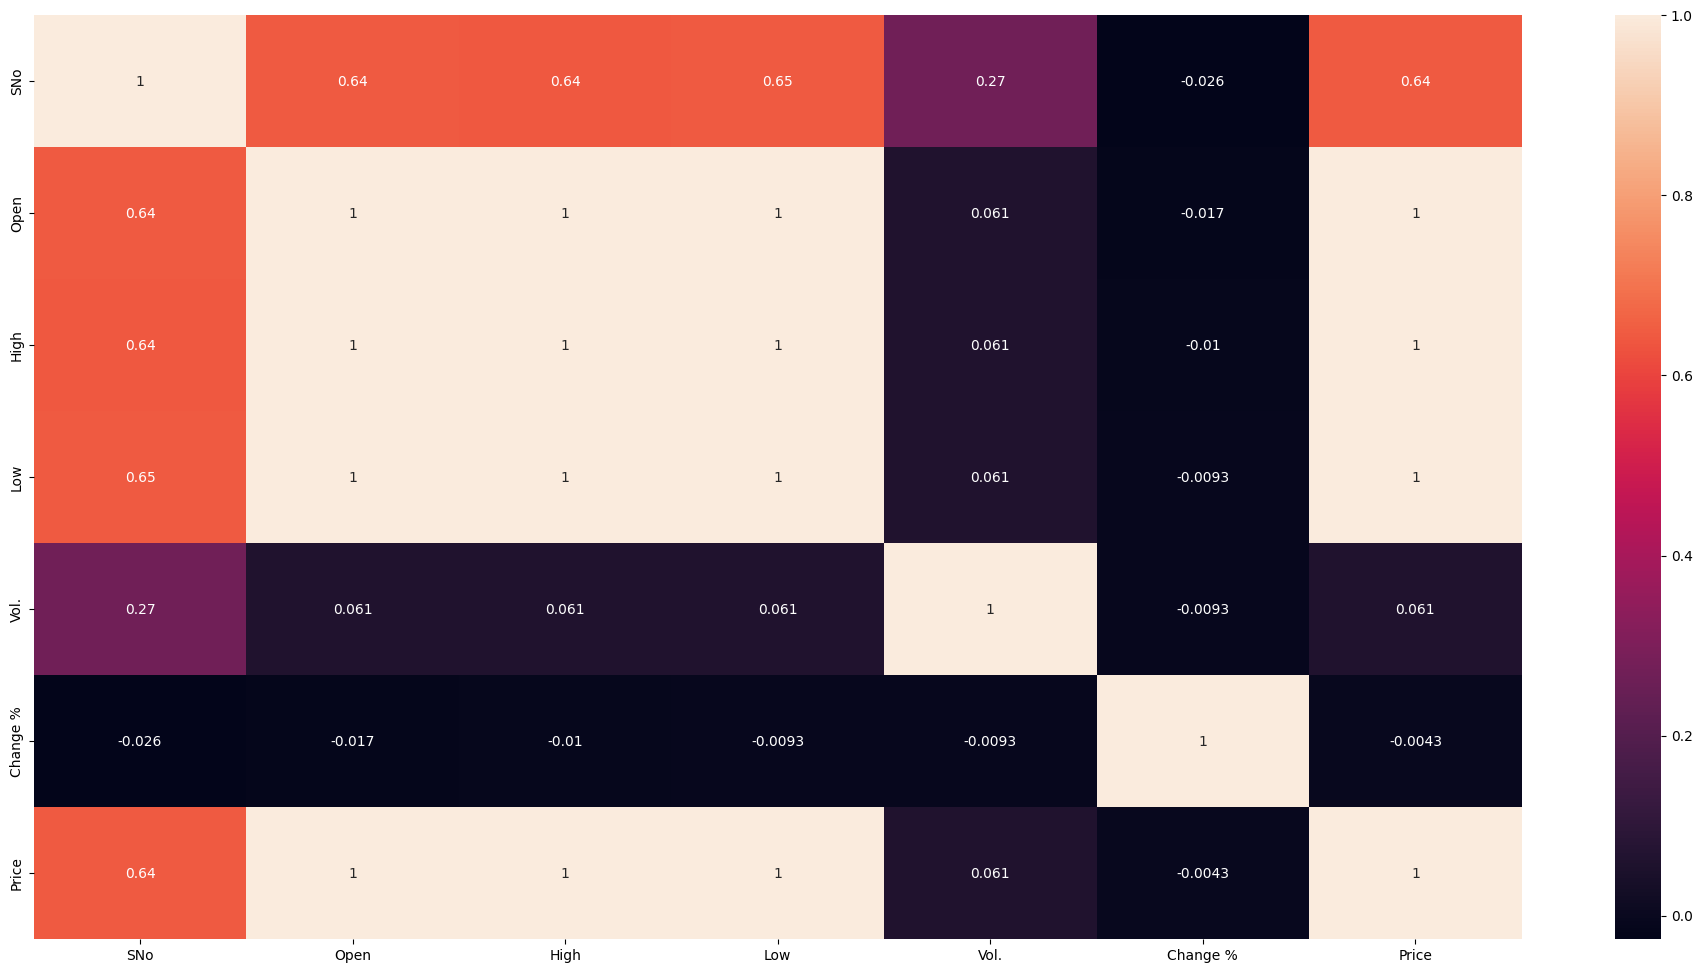

In [63]:
plt.figure(figsize=(24, 12))
sns.heatmap(df.corr(), annot=True)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

standard = StandardScaler()

In [16]:
X = df.drop(columns=['Price'])
y = df['Price']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train = standard.fit_transform(X_train)
X_test = standard.transform(X_test)

In [50]:
X_test.shape

(812, 9)

# Model Train

In [105]:
import xgboost as xgb
import math
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
xgb_reg = xgb.XGBRegressor(n_jobs=-1)

In [23]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [24]:
y_pred_test = xgb_reg.predict(X_test)
r2score = round(r2_score(y_pred_test,y_test),2)*100

In [25]:
print("R2 Score on Test Data is,", r2score)

R2 Score on Test Data is, 100.0


In [26]:
mse = mean_squared_error(y_test, y_pred_test)

rmse = round(math.sqrt(mse), 2)

print(rmse)

262.33


In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
params = {
'n_estimators' : [100, 150, 200, 250, 300, 350, 400, 500, 750, 800, 850], # no of trees
'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.25, 0.5], # eta
'min_child_weight': [1, 5, 7, 10],
'gamma': [0.1, 0.5, 1, 1.5, 2, 5],
'subsample': [0.6, 0.8, 1.0],
'colsample_bytree': [0.6, 0.8, 0.9, 1.0],
'max_depth': [3, 4, 5, 10, 12, 15, 20]
}
folds = 5
param_comb = 100

random_search = RandomizedSearchCV(xgb_reg, param_distributions=params, n_iter=param_comb, n_jobs=-1, cv=folds, verbose=3, random_state=42)
# Fitting on the validation set
random_search.fit(X_test, y_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 2/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.25, max_depth=20, min_child_weight=7, n_estimators=350, subsample=1.0;, score=0.999 total time=   0.7s
[CV 2/5] END colsample_bytree=0.9, gamma=2, learning_rate=0.04, max_depth=20, min_child_weight=10, n_estimators=500, subsample=1.0;, score=0.999 total time=   0.7s
[CV 4/5] END colsample_bytree=0.9, gamma=2, learning_rate=0.04, max_depth=20, min_child_weight=10, n_estimators=500, subsample=1.0;, score=0.995 total time=   0.7s
[CV 4/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.25, max_depth=20, min_child_weight=7, n_estimators=350, subsample=1.0;, score=0.997 total time=   0.7s
[CV 3/5] END colsample_bytree=0.9, gamma=2, learning_rate=0.04, max_depth=20, min_child_weight=10, n_estimators=500, subsample=1.0;, score=0.997 total time=   0.7s
[CV 1/5] END colsample_bytree=0.9, gamma=2, learning_rate=0.04, max_depth=20, min_child_weight=10, n_estimators=500

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          predictor=None, random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0.1, 0.5, 1, 1.5, 2, 5],
                                        'learning_rate': [0.01, 0.02, 0.03,
                                                          0.04, 0.05, 0.1, 0.25,
                                                          0.5],
                                        'max_depth': [3, 4, 5, 10, 12, 15, 20],
                                        'min_child_weight': [1, 5, 7, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400, 500,
                                                         750, 800, 850],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, verbose=3)

In [30]:
print ('We can get score of :', random_search.best_score_,' using', random_search.best_params_)

We can get score of : 0.9989174431669291  using {'subsample': 0.6, 'n_estimators': 350, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.02, 'gamma': 1.5, 'colsample_bytree': 0.6}


In [31]:
xgb_reg_hpt = xgb.XGBRegressor(subsample = random_search.best_params_['subsample'], n_estimators = random_search.best_params_['n_estimators'], min_child_weight = random_search.best_params_['min_child_weight'], max_depth = random_search.best_params_['max_depth'], learning_rate = random_search.best_params_['learning_rate'], gamma = random_search.best_params_['gamma'], colsample_bytree = random_search.best_params_['colsample_bytree'], n_jobs = -1)

In [45]:
xgb_reg_hpt.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1.5, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=350, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [46]:
y_pred_test_hpt = xgb_reg_hpt.predict(X_test)

r2_score = round(r2_score(y_pred_test_hpt,y_test),2)*100

TypeError: 'numpy.float64' object is not callable

In [47]:
r2_score

100.0

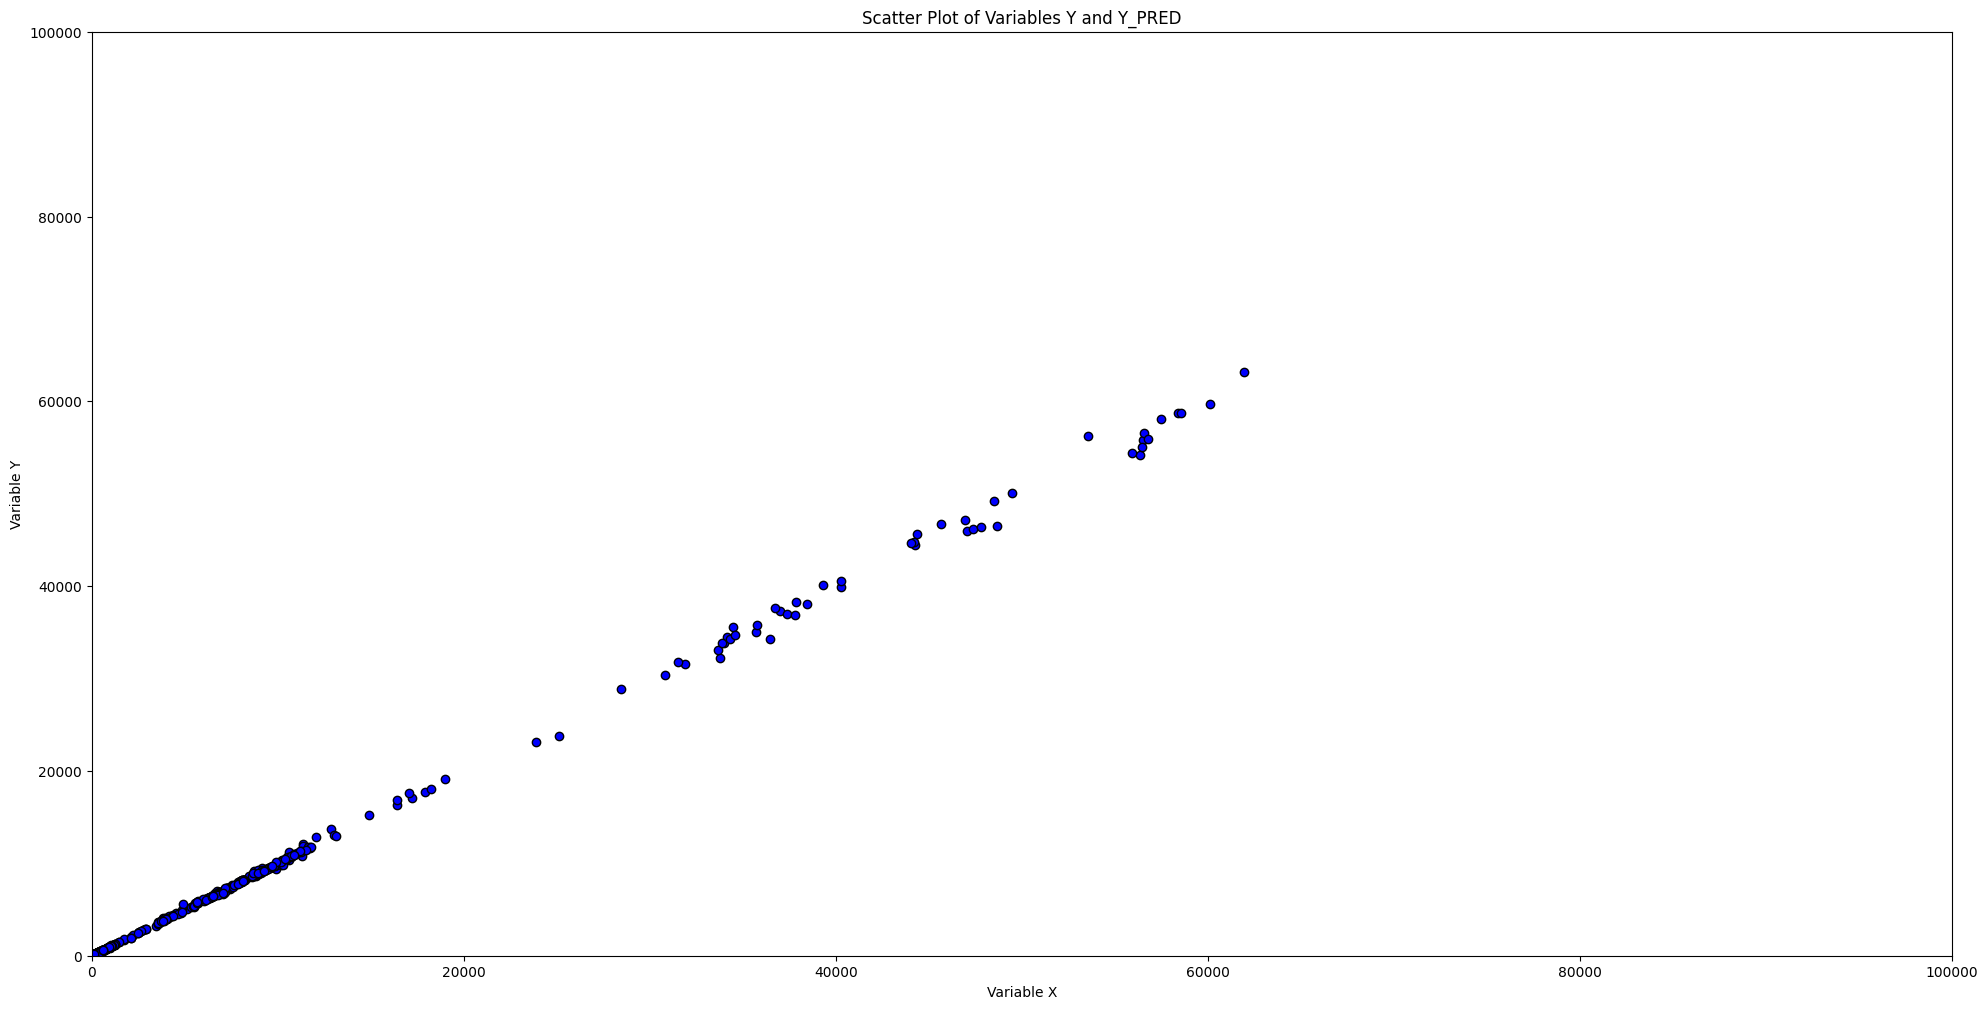

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 12))
plt.scatter(y_pred_test, list(y_test), color='blue', edgecolors='black') #, label=f"Correlation: {correlation:.2f}")
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title('Scatter Plot of Variables Y and Y_PRED')
plt.xlim(0, 100000)
plt.ylim(0, 100000)
# plt.legend()
plt.grid(False)
plt.show()

# M2

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [66]:
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)

R-squared score: 0.9993578754064569


In [67]:
mse = mean_squared_error(y_test, y_pred)

rmse = round(math.sqrt(mse), 2)

print(rmse)

269.71


In [73]:
for i in range(len(y_test)):
    print(list(y_test)[i],'|',list(y_pred)[i])

44.2 | 46.8
11.8 | 11.699999999999998
477.7 | 477.7
405.5 | 394.3
90.1 | 88.1
9.4 | 8.8
10670.9 | 10672.9
1180.8 | 1190.5
134.8 | 133.4
20.4 | 21.2
117.0 | 131.3
6854.8 | 6962.1
459.6 | 457.6
378.9 | 387.3
4.9 | 4.9
6737.8 | 6647.1
11.4 | 11.0
183.1 | 187.5
3.2 | 3.5
6366.8 | 6326.8
231.1 | 230.2
0.9 | 0.9000000000000002
6.3 | 6.3
255.0 | 259.7
6.1 | 5.8
6213.3 | 5883.5
6230.2 | 6338.0
337.9 | 344.9
380.0 | 387.3
7723.0 | 7742.7
455.0 | 454.0
33797.4 | 33515.7
10235.1 | 10342.1
31594.0 | 31692.0
29.6 | 29.4
8678.5 | 8732.6
6.3 | 5.6
5.8 | 5.5
29.9 | 30.4
263.3 | 265.0
1149.1 | 1147.6
7276.0 | 7332.3
9655.7 | 9624.6
5830.9 | 5745.1
6256.6 | 6398.9
6808.9 | 6833.5
10.0 | 10.5
2798.8 | 2705.0
10776.2 | 10727.9
9888.7 | 10141.5
0.1 | 0.09999999999999988
1171.6 | 1188.7
891.1 | 893.8
13749.6 | 13063.8
654.1 | 654.7
574.7 | 574.6
12.0 | 11.9
589.5 | 586.5
9424.8 | 10166.0
0.2 | 0.20000000000000007
4005.1 | 4102.2
645.7 | 650.0
1507.8 | 1545.3
12.3 | 12.3
8.5 | 8.2
285.1 | 281.6
1.1 | 1.0
760

# Test diff

In [83]:
df_t = pd.read_csv('Ethereum.csv')

In [84]:
df_t[['Year', 'Month', 'Day']] = df_t['Date'].str.split('-', expand=True)

df_t = df_t.drop(columns=['Date'])

df_t = df_t[['SNo', 'Year', 'Month', 'Day', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Price']]

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X = df_t.drop(columns=['Price'])
y = df_t['Price']

X = standard.transform(X)


array([[-1.75365334,  0.11153543, -1.02199449, ..., -0.50674414,
        -0.3069531 ,  0.53890835],
       [-1.7527955 ,  0.11153543, -1.02199449, ..., -0.50667895,
        -0.30676315,  0.14860904],
       [-1.75193765,  0.11153543, -1.02199449, ..., -0.50665978,
        -0.30607722,  0.92920765],
       ...,
       [-0.0456788 ,  1.66708544,  0.43338309, ..., -0.20783776,
         0.482027  , -0.00216078],
       [-0.04482095,  1.66708544,  0.43338309, ..., -0.19796532,
         0.84330211,  0.24466401],
       [-0.0439631 ,  1.66708544,  0.43338309, ..., -0.19299555,
         0.54021514, -0.02161495]])

In [106]:
y_pred_test = xgb_reg.predict(X)

r2score = r2_score(list(y_pred_test), list(y))

In [108]:
r2score*100

61.7543554621363

In [93]:
for i in range(len(y)):
    print(list(y)[i],'|',list(y_pred_test)[i])

11.75 | 14.569546
11.95 | 12.010645
12.92 | 13.034273
15.07 | 10.728963
12.5 | 5.7189198
13.06 | 16.914797
12.88 | 9.966469
10.74 | 5.7189198
10.74 | 8.740845
10.31 | 6.872435
10.18 | 9.760534
11.95 | 11.843866
11.37 | 9.134489
12.43 | 12.790927
11.2 | 8.596068
10.67 | 8.756101
11.0 | 11.55948
10.4 | 8.235066
11.62 | 11.903124
11.79 | 11.727309
11.85 | 11.609092
11.41 | 9.336774
11.62 | 11.628203
11.61 | 10.415048
11.75 | 10.937274
11.15 | 9.923627
10.4 | 7.4392214
10.76 | 14.05958
10.12 | 57.09813
9.71 | 8.445171
9.15 | 8.516904
8.76 | 7.096715
8.68 | 7.7115
7.53 | 4.333562
8.09 | 10.497553
8.46 | 13.956697
8.32 | 7.5611176
8.54 | 9.268018
9.46 | 7.5896697
8.97 | 6.651826
8.71 | 7.075147
8.61 | 9.701958
8.11 | 6.1627154
7.97 | 4.6132374
8.46 | 9.792844
8.1 | 6.935986
7.54 | 8.568435
7.5 | 7.894201
7.8 | 8.566086
7.33 | 5.304302
7.52 | 9.268018
8.87 | -5.181806
8.75 | 7.766465
10.0 | 10.97581
9.34 | 8.614825
9.46 | 10.270642
9.79 | 14.05958
9.35 | 9.1930895
9.35 | 10.130857
9.5 | 11.34

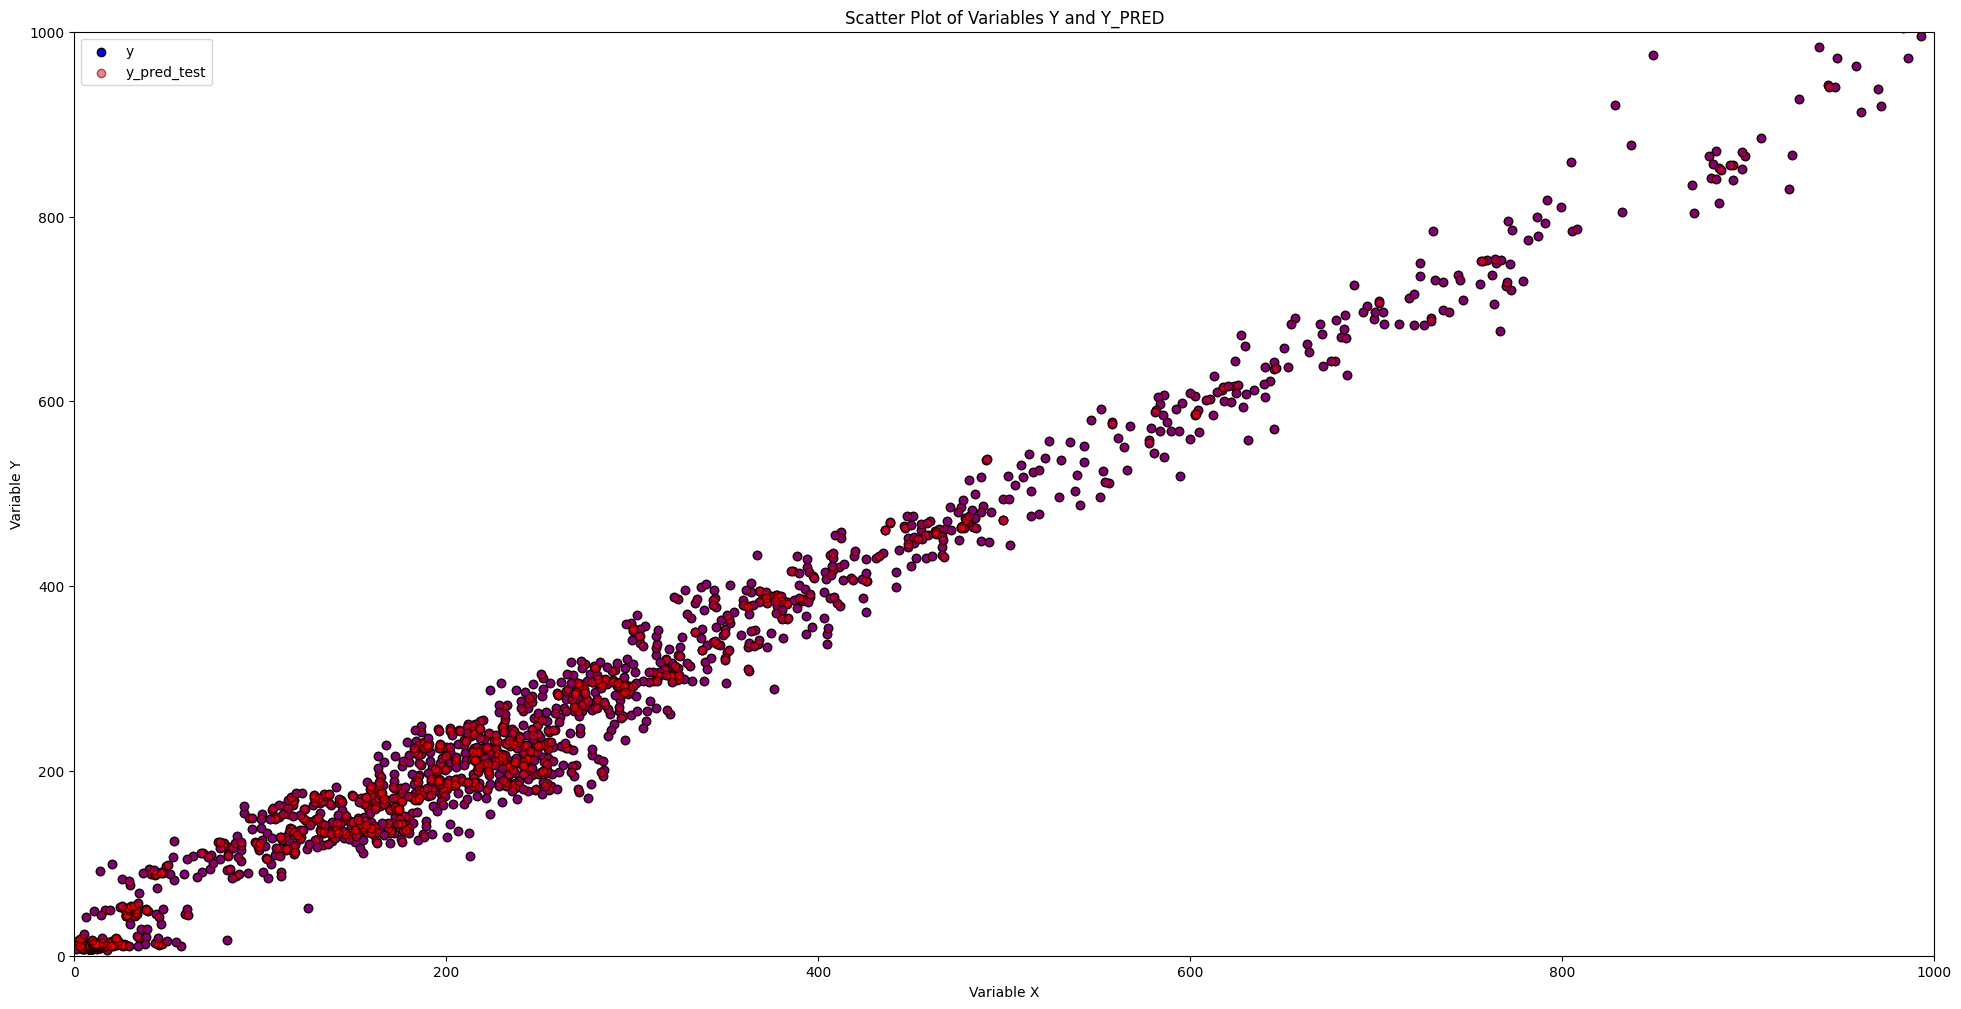

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 12))
plt.scatter(y_pred_test, list(y), color='blue', edgecolors='black', label='y') #, label=f"Correlation: {correlation:.2f}")
plt.scatter(y_pred_test, y, color='red', edgecolors='black', alpha=0.5, label='y_pred_test')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title('Scatter Plot of Variables Y and Y_PRED')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.legend()
plt.grid(False)
plt.show()